# Analisi tendenze di YouTube

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from matplotlib import pyplot as plt

In [ ]:
usvideos = pd.read_csv('/content/drive/My Drive/USvideos.csv')
usvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
usvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
usvideos.sort_values(by='views', ascending=False).head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...


Il data set è pieno di video duplicati, dato che un singolo video può apparire nelle tendenze più volte. Vediamo quali sono i video che sono apparsi più volte in tendenza.

In [ ]:
most_trending = usvideos[['video_id','title','trending_date']].groupby(['video_id', 'title']).count().sort_values(by='trending_date', ascending=False)
most_trending = most_trending.rename(columns={'trending_date' : 'trending_occurrences'})
most_trending.head(10)

,,trending_occurrences
video_id,title,
j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30
iILJvqrAQ_w,Charlie Puth - BOY [Official Audio],29
t4pRQ0jn23Q,YoungBoy Never Broke Again Goes Sneaker Shopping With Complex,29
r-3iathMo7o,"The ULTIMATE $30,000 Gaming PC Setup",29
NBSAQenU2Bk,Rooster Teeth Animated Adventures - Millie So Serious,29
QBL8IRJ5yHU,Why I'm So Scared (being myself and crying too much),29
8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,29
6S9c5nnDd_s,Bohemian Rhapsody | Teaser Trailer [HD] | 20th Century FOX,28
MAjY8mCTXWk,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV",28


Il video che è apparso più volte in tendenza è di "Lucas and Marcus", due fratelli che in occasione della festa della mamma hanno regalato molti soldi alla madre.

(array([772., 560., 600., 567., 695., 761., 697., 360., 251., 156., 180.,
        167., 179., 142.,  93.,  51.,  39.,  38.,  25.,  22.,  23.,  17.,
         15.,   8.,  16.,   3.,  10.,  15.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 28 Patch objects>)

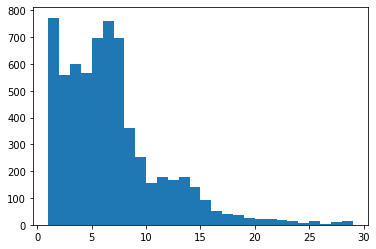

In [ ]:
plt.hist(most_trending['trending_occurrences'], bins=range(1,30))

I video che appaiono 8 volte o più in tendenza diventano sempre più rari al crescere delle occorrenze, ma è comunque interessante vedere che non è poco realistico vedere lo stesso video nelle tendenze fino a 5-7 volte, come se ci fosse un elbow point tra 7 e 8.

L'algoritmo che porta i video in tendenza non è pubblico, ma YouTube ha dato qualche informazione in un video ufficiale: https://www.youtube.com/watch?v=GZmGmkOJ9ME

Il numero di visualizzazioni è un fattore fondamentale, ma in particolare lo è il suo tasso di crescita. Si può verificare cercando nel dataset il video con più visualizzazioni del 2018, preso da questa classifica: https://ew.com/music/2018/12/06/youtube-top-music-videos-2018/

La prima lista contenuta nell'articolo riguarda video musicali e la seconda di varie categorie. Utilizzando il Web Archive, un servizio che contiene backup regolari di pagine web nel tempo, si son confrontate le visualizzazioni agli ultimi minuti del 31/12/2018 e il primo video musicale è il più visto, con 1,527,060,108 visualizzazioni.

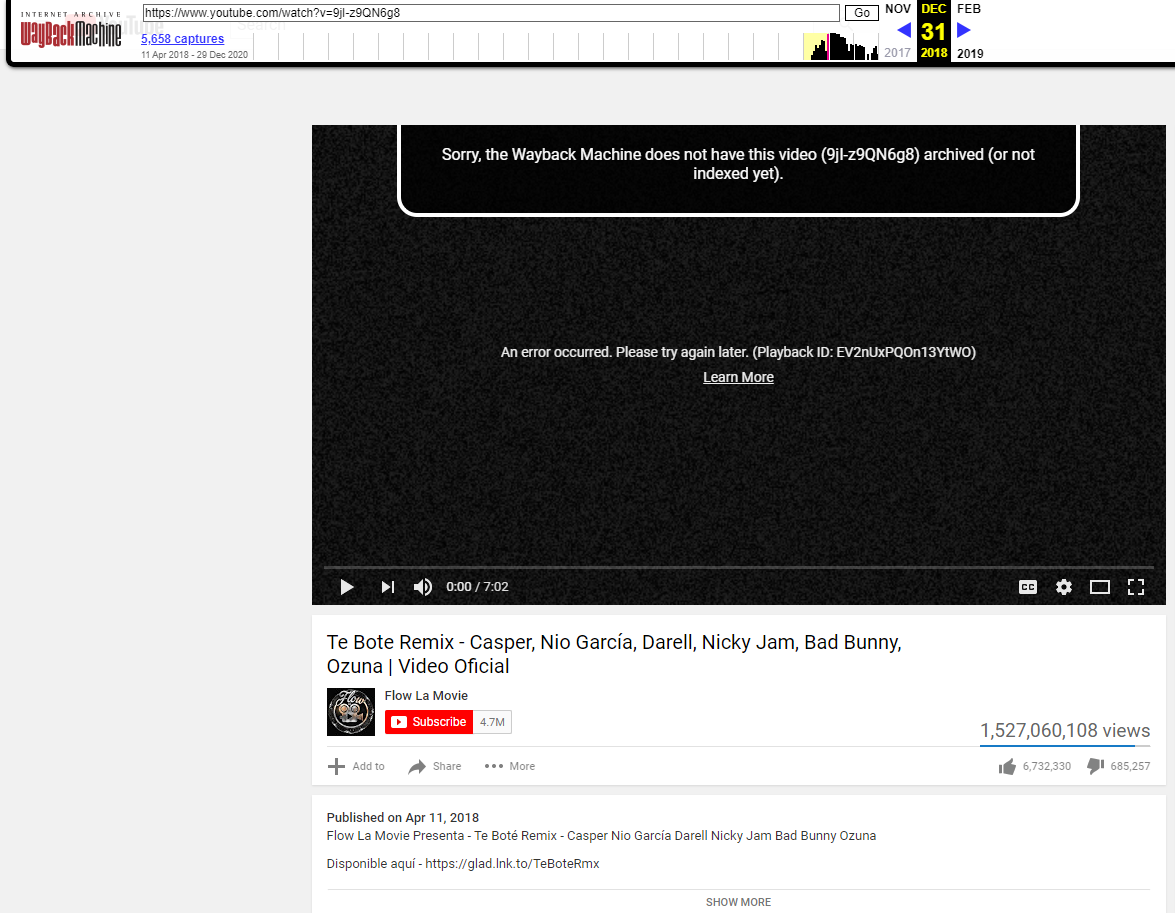

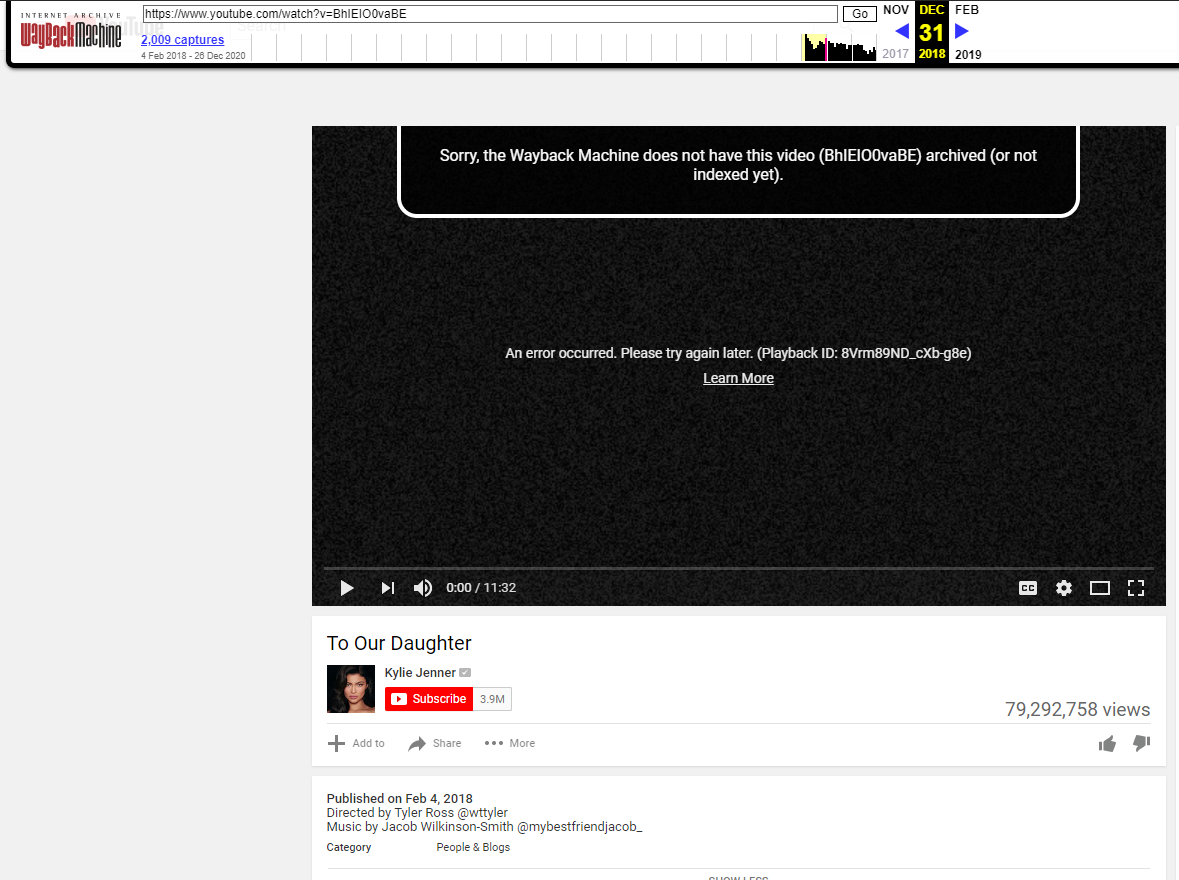

In [ ]:
usvideos[usvideos['video_id']=='9jI-z9QN6g8']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


Il video musicale non è mai stato in tendenze, nonostante sia il più visto del 2018. Invece, l'altro video "To Our Daughter" è apparso ben 10 volte.

In [ ]:
usvideos[usvideos['video_id']=='BhIEIO0vaBE']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
16181,BhIEIO0vaBE,18.05.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",20921796,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
16381,BhIEIO0vaBE,18.06.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",35830721,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
16590,BhIEIO0vaBE,18.07.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",40801423,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
16814,BhIEIO0vaBE,18.08.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",44818108,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17052,BhIEIO0vaBE,18.09.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",48635732,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17286,BhIEIO0vaBE,18.10.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",51243149,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17496,BhIEIO0vaBE,18.11.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",53183123,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17716,BhIEIO0vaBE,18.12.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",54454945,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
17916,BhIEIO0vaBE,18.13.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",55063465,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...
18150,BhIEIO0vaBE,18.14.02,To Our Daughter,Kylie Jenner,22,2018-02-04T20:27:38.000Z,"Kylie Jenner|""Kylie""|""Travis Scott""|""Baby""|""An...",56111957,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...


Rimuoviamo i duplicati dal dataset e aggiungiamo la colonna che identifica il numero di volte in cui il video in questione è apparso in tendenza.

In [ ]:
usvideos_duplicates = usvideos.copy()
usvideos = usvideos.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id'])
usvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...
34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


In [ ]:
usvideos_trending_occurrences = pd.merge(usvideos, most_trending, on='video_id', how='left')
usvideos_trending_occurrences.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_occurrences
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",7
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,7
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,6


Vediamo la relazione tra il numero di visualizzazioni e il numero di occorrenze nelle tendenze.

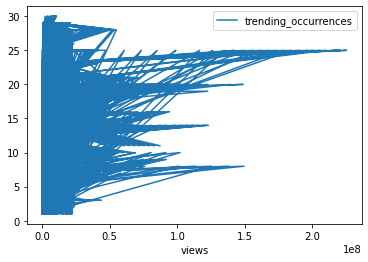

In [ ]:
usvideos_trending_occurrences.plot(x='views', y='trending_occurrences')

La relazione non è ben definita, ma si può notare che i video con più visualizzazioni tendono ad apparire almeno una ventina di volte nelle tendenze.

Analizziamo le statistiche dei video in base alla categoria.

In [ ]:
usvideos.groupby('category_id').mean().sort_values(by='views', ascending=False)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
10,6.027699e+06,188066.835206,6572.409488,16061.277154,0.002497,0.006242,0.000000
1,2.578968e+06,53248.090625,2158.934375,6159.412500,0.012500,0.009375,0.003125
20,2.325087e+06,67877.339806,6067.883495,13463.271845,0.019417,0.000000,0.000000
29,2.218901e+06,170616.000000,40233.000000,52888.000000,0.071429,0.071429,0.000000
24,1.744890e+06,41601.003085,4152.041949,6106.779149,0.019124,0.003085,0.001234
2,1.449487e+06,10286.000000,653.478873,1737.281690,0.014085,0.014085,0.000000
17,1.424202e+06,28031.387528,1775.507795,3318.706013,0.011136,0.006682,0.000000
23,1.422561e+06,55068.248162,1962.240809,5489.762868,0.001838,0.000000,0.000000
22,1.348810e+06,46464.967677,2782.711111,6167.595960,0.016162,0.010101,0.000000


Si può vedere la lista delle categorie associata all'id qui: https://gist.github.com/dgp/1b24bf2961521bd75d6c

I video più visti sono quelli musicali, a seguire quelli di film e animazione e poi quelli di videogiochi. I video meno visti in media sono quelli di politica.

In [ ]:
usvideos.groupby('category_id').mean().sort_values(by='comment_count', ascending=False)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
29,2.218901e+06,170616.000000,40233.000000,52888.000000,0.071429,0.071429,0.000000
10,6.027699e+06,188066.835206,6572.409488,16061.277154,0.002497,0.006242,0.000000
20,2.325087e+06,67877.339806,6067.883495,13463.271845,0.019417,0.000000,0.000000
22,1.348810e+06,46464.967677,2782.711111,6167.595960,0.016162,0.010101,0.000000
1,2.578968e+06,53248.090625,2158.934375,6159.412500,0.012500,0.009375,0.003125
24,1.744890e+06,41601.003085,4152.041949,6106.779149,0.019124,0.003085,0.001234
23,1.422561e+06,55068.248162,1962.240809,5489.762868,0.001838,0.000000,0.000000
26,9.378062e+05,34758.220539,1187.250842,4872.745791,0.001684,0.001684,0.000000
28,1.124838e+06,26681.296588,1437.860892,3651.183727,0.031496,0.007874,0.000000


I video con più commenti e non mi piace sembrano essere quelli della categoria 29, "Nonprofits & Activism", ma in realtà pare che la media sia influenzata dai primi due video più visti di questa categoria, in particolare il primo: questo è un video di Logan Paul, uno YouTuber non molto amato a seguito di una famosa controversia che lo riguarda (https://en.wikipedia.org/wiki/Logan_Paul#2017%E2%80%932018:_Suicide_forest_controversy).

In [ ]:
usvideos[usvideos['category_id']==29].head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
15571,oWjxSkJpxFU,18.01.02,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...
18769,RQZr2NgKPiU,18.17.02,"Яхты, олигархи, девочки: охотница на мужчин ра...",Алексей Навальный,29,2018-02-08T09:40:57.000Z,"Навальный|""Навальный2018""|""Фонд борьбы с корру...",5579079,365439,63579,77462,https://i.ytimg.com/vi/RQZr2NgKPiU/default.jpg,False,False,False,Самое странное и скандальное расследование ФБК...
19557,obRG-2jurz0,18.21.02,Does saving more lives lead to overpopulation?,Bill Gates,29,2018-02-13T09:50:47.000Z,"Bill|""Gates""",357429,13341,619,1984,https://i.ytimg.com/vi/obRG-2jurz0/default.jpg,False,False,False,Bill Gates explains his answer to the tough qu...
38884,pwGbwYAfSmg,18.04.06,5 books worth reading this summer,Bill Gates,29,2018-05-21T13:30:33.000Z,"Bill|""Gates""",333587,10918,161,613,https://i.ytimg.com/vi/pwGbwYAfSmg/default.jpg,False,False,False,If you’re looking for something to read over t...
16572,ZYKUXMAou3Q,18.06.02,Rose McGowan Shares Her Thoughts On 'Time's Up...,The View,29,2018-01-30T16:50:26.000Z,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""...",295068,3822,797,1348,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN
12367,mt22NvsTRG0,18.16.01,The Obama Presidential Center: Where We Are Now,Obama Foundation,29,2018-01-12T19:17:22.000Z,[none],73649,2721,122,74,https://i.ytimg.com/vi/mt22NvsTRG0/default.jpg,False,False,False,"One year ago, President and Mrs. Obama laid ou..."
7773,xYShiXMGULE,17.22.12,Living under a bridge doesn't stop this homele...,Invisible People,29,2017-12-17T06:10:08.000Z,"invisible people|""invisiblepeople""|""invisible ...",41183,1621,60,662,https://i.ytimg.com/vi/xYShiXMGULE/default.jpg,False,False,False,A few months back I logged onto Facebook and w...
19570,o2e2B5wsFsQ,18.21.02,2018 Writers Guild Awards - Amber Ruffin Openi...,Writers Guild of America East,29,2018-02-12T06:51:19.000Z,"Writers Guild Awards|""Amber Ruffin""|""Late Nigh...",32744,473,11,54,https://i.ytimg.com/vi/o2e2B5wsFsQ/default.jpg,False,False,False,Host Amber Ruffin opens the 70th annual Writer...
11541,ESRAQtXVQL0,18.12.01,Homeless little boy gets a bed for Christmas,Humble Design,29,2018-01-09T02:00:25.000Z,"charity|""humble design""|""detroit""|""design""|""ho...",23634,131,13,23,https://i.ytimg.com/vi/ESRAQtXVQL0/default.jpg,False,False,False,Daeyers is eight years old and has been homele...
7381,6kLYXbNZWRs,17.20.12,Meet Teen Vogue's 2017 21 Under 21 | Teen Vogue,Teen Vogue,29,2017-12-15T17:00:19.000Z,"inspiring|""teen vogue""|""21 under 21""|""nadya""|""...",16948,1248,17,46,https://i.ytimg.com/vi/6kLYXbNZWRs/default.jpg,False,False,False,"Meet Teen Vogue’s 21 Under 21 class of 2017, f..."


In [ ]:
vgsales = pd.read_csv('/content/drive/My Drive/vgsales.csv')
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
vgsales.groupby('Genre')['Name'].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Name, dtype: int64